<a href="https://colab.research.google.com/github/eriksali/Text-Analytics_LDA/blob/master/lda_silhoette_doc_to_topic_no_plt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib
import time
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)


Saving utils.py to utils.py


5237

In [3]:
from utils import load_data
from utils import preprocess_pipeline

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import os
import pandas as pd

dirpath = '/content/drive/MyDrive/Names/'
output = '/content/drive/MyDrive/name.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

for filename in sorted(files):
    data = pd.read_csv(filename, index_col=0, header=None)
    csvout_lst.append(data)

pd.concat(csvout_lst).to_csv(output, index=True)

In [6]:
from pandas import read_csv
df = read_csv('/content/drive/MyDrive/name.csv')
corpus = df.values
# print(corpus)

In [8]:
# corpus.shape

(1999, 1)

In [7]:
documents = corpus.tolist()

In [10]:
# print(documents[5])

['exampl txt read exampl list exampl list data exampl list path path join get temp dir gfile open exampl list path write exampl list data exampl dataset util read exampl list exampl list path list equal exampl']


In [8]:
# start = time.time()
preprocessed_documents = [" ".join(s) for s in documents]
# print(f"Preprocessing time: {time.time()-start:.1f}s.")

In [9]:
import nltk
nltk.download('stopwords')
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, stop_words=stopwords.words('english')+['like', 'said', 'could', 'would', 'one', 'know', 'us'], max_features=1000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
tf = tf_vectorizer.fit_transform(preprocessed_documents).toarray()


In [11]:
features = tf_vectorizer.get_feature_names_out()

In [15]:
# tf.shape

(1999, 785)

In [16]:
# len(features)

785

In [12]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [13]:
from utils import print_topics, get_topics_top_words
n_topics = 5
# alpha = 1 / n_components, beta = 1 / n_components
model = LDA(n_components=n_topics, random_state=0)
# calculate document-to-topic matrix
doc_topic = model.fit_transform(tf)

In [14]:
from sklearn.cluster import KMeans

C = 5
random_state = 42
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

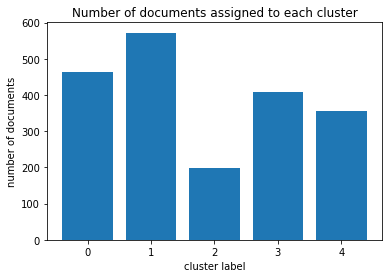

In [31]:
# x, y = np.unique(cluster_labels, return_counts=True)
# plt.bar(x, y)
# plt.xticks(range(C), range(C))
# plt.title("Number of documents assigned to each cluster")
# plt.xlabel("cluster label")
# plt.ylabel("number of documents")
# plt.show()

In [15]:
from sklearn import metrics

def plot_cluster_metrics(data, min_clusters=2, max_clusters=20, iters=10):
    n_clusters = []

    wgss_mean = [] # within group sum of squares, or inertia
    wgss_var = [] # variance of results because it's stochastic

    silhouette_mean = []
    silhouette_var = []
    
    for n in range(min_clusters, max_clusters+1):
        n_clusters.append(n)

        wgss_iters = []
        silhouette_iters = []

        for i in range(iters):
            clusterer = KMeans(n_clusters=n).fit(data)
            wgss_iters.append(clusterer.inertia_)
            silhouette_iters.append(metrics.silhouette_score(data,
                                                             clusterer.labels_,
                                                             metric='euclidean'))

        wgss_mean.append(np.array(wgss_iters).mean())
        wgss_var.append(np.array(wgss_iters).var())

        silhouette_mean.append(np.array(silhouette_iters).mean())
        silhouette_var.append(np.array(silhouette_iters).var())

    wgss_mean = np.array(wgss_mean)
    wgss_var = np.array(wgss_var)

    silhouette_mean = np.array(silhouette_mean)
    silhouette_var = np.array(silhouette_var)
    
    # plot every metric
    # plt.figure(figsize=(10, 10))
    
    # plt.subplot(211)
    # plt.xticks(n_clusters)
    # plt.plot(n_clusters, silhouette_mean, alpha=1, color='red', label='silhouette')
    # plt.fill_between(n_clusters,
                     # silhouette_mean-silhouette_var,
                     # silhouette_mean+silhouette_var,
                     # alpha=0.2)
    # plt.title("Evaluate quality of clusters")
    # plt.grid(True)
    # plt.legend()
    
    # plt.subplot(212)
    # plt.xticks(n_clusters)
    # plt.plot(n_clusters, wgss_mean, alpha=1, label='inertia', color='orange')
    # plt.fill_between(n_clusters, wgss_mean-wgss_var, wgss_mean+wgss_var, alpha=0.2)
    # plt.xlabel("# clusters")
    # plt.legend()
    # plt.grid(True)
    
    #plt.savefig("part-2-images/clustering-metrics.jpg", dpi=100)
    # plt.show()
    return
plot_cluster_metrics(doc_topic)

In [25]:
# adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_
# silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

def plot_cluster_silhouette(data, n_clusters, cluster_labels):
    ## fig, ax1 = plt.subplots(1, 1)
    ## fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ## ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ## ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    # for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        # ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # ith_cluster_silhouette_values.sort()

        # size_cluster_i = ith_cluster_silhouette_values.shape[0]
        # y_upper = y_lower + size_cluster_i

        # color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        # ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          # ith_cluster_silhouette_values,
                          # facecolor=color,
                          # edgecolor=color,
                          # alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        # ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        # y_lower = y_upper + 10  # 10 for the 0 samples

    # ax1.set_xlabel("silhouette coefficient values")
    # ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    # ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # ax1.set_yticks([])  # Clear the yaxis labels / ticks
    # ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # plt.suptitle(("Clustering on sample data with # clusters = "
                  # + str(n_clusters) + "\nAverage silhouette_score is : "
                  # + str(silhouette_avg)))
    
    # plt.savefig("part-2-images/clustering-silhouette.jpg", dpi=100)
    # plt.show()
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
C = n_topics
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

plot_cluster_silhouette(doc_topic, C, cluster_labels)

For n_clusters = 5 The average silhouette_score is : 0.544501062929461
